In [24]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, roc_curve, auc

# visulizon
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
#load dataset 
df_test = pd.read_csv('../datasets/NumericalText/titanic/test.csv')
df_train = pd.read_csv('../datasets/NumericalText/titanic/train.csv')

In [26]:
#Display datasets to show missing, inconsistent data 
df_test.head(10)
#Age missing exists
# Cabin Null values ( drop it)
# normalize Embarked for also missing values using mode()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [27]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [28]:
#Combine datasets for consistent processing 
# train, test 
# conctation 
df_concated = pd.concat([df_train, df_test], keys =['train', 'test'])

### Preprocessing Steps
- **filling missing values in columns**
    - Age and Fare using the median
    - Embarked ( char ) using mode 
---
- **Creating new Feature for better learning performance**
    - These features aim to capture potentially useful information about passengers' social connections aboard the Titanic.
    - **`FimalySize` Feature**
        - `SibSp`Number of siblings and spouses aboard.
        - `Parch` Numer of Parents and Childern aboard.
        - adding one for the passanger themselves
        -  making FamilySize a comprehensive measure of a passenger's group 
        size.
    - **`ISAlone` Feature**
        - This feature identifies passengers traveling alone 
--- 
- **Encoding char columns using one Hot Encoding in LabelEncoder**
---
- **drop unused columns due to serveral reasons**
    - Columns are **`Cabin`, `SibSp`, `Parch`**
    - **reasons** :
    - High Missing Rate `Cabin` Feature
    - low predictice power 
    - to reduce the noise and simplify the dataset 
    

In [29]:
#Preprocessing Step 

# missing values in Age, Fare, and Embarked 
df_concated['Age'].fillna(df_concated['Age'].median(), inplace=True)  
df_concated['Fare'].fillna(df_concated['Fare'].median(), inplace =  True)
# char values 
df_concated['Embarked'].fillna(df_concated['Embarked'].mode(), inplace=True)

# Create new features
df_concated['FamilySize'] = df_concated['SibSp'] + df_concated['Parch'] + 1
df_concated['IsAlone'] = (df_concated['FamilySize'] == 1).astype(int)

#Encoding Categorical values 
le = LabelEncoder()
df_concated['Sex'] = df_concated['Sex'].map({'male': 0, 'female': 1})  # Encode Sex
df_concated['Embarked'] = le.fit_transform(df_concated['Embarked']) # one Hot Encode 

df_concated = df_concated.drop(columns= ['Cabin','SibSp','Parch'])

df_concated.head(20)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7764\3135475038.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_concated['Age'].fillna(df_concated['Age'].median(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_7764\3135475038.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

PassengerId  Survived  Pclass  \
train 0             1       0.0       3   
      1             2       1.0       1   
      2             3       1.0       3   
      3             4       1.0       1   
      4             5       0.0       3   
      5             6       0.0       3   
      6             7       0.0       1   
      7             8       0.0       3   
      8             9       1.0       3   
      9            10       1.0       2   
      10           11       1.0       3   
      11           12       1.0       1   
      12           13       0.0       3   
      13           14       0.0       3   
      14           15       0.0       3   
      15           16       1.0       2   
      16           17       0.0       3   
      17           18       1.0       2   
      18           19       0.0       3   
      19           20       1.0       3   

                                                       Name  Sex   Age  \
train 0                             Braund, Mr. Owen Harris    0  22.0   
      1   Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0   
      2                              Heikkinen, Miss. Laina    1  26.0   
      3        Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0   
      4                            Allen, Mr. William Henry    0  35.0   
      5                                    Moran, Mr. James    0  28.0   
      6                             McCarthy, Mr. Timothy J    0  54.0   
      7                      Palsson, Master. Gosta Leonard    0   2.0   
      8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    1  27.0   
      9                 Nasser, Mrs. Nicholas (Adele Achem)    1  14.0   
      10                    Sandstrom, Miss. Marguerite Rut    1   4.0   
      11                           Bonnell, Miss. Elizabeth    1  58.0   
      12                     Saundercock, Mr. William Henry    0  20.0   
      13                        Andersson, Mr. Anders Johan    0  39.0   
      14               Vestrom, Miss. Hulda Amanda Adolfina    1  14.0   
      15                   Hewlett, Mrs. (Mary D Kingcome)     1  55.0   
      16                               Rice, Master. Eugene    0   2.0   
      17                       Williams, Mr. Charles Eugene    0  28.0   
      18  Vander Planke, Mrs. Julius (Emelia Maria Vande...    1  31.0   
      19                            Masselmani, Mrs. Fatima    1  28.0   

                    Ticket     Fare  Embarked  FamilySize  IsAlone  
train 0          A/5 21171   7.2500         2           2        0  
      1           PC 17599  71.2833         0           2        0  
      2   STON/O2. 3101282   7.9250         2           1        1  
      3             113803  53.1000         2           2        0  
      4             373450   8.0500         2           1        1  
      5             330877   8.4583         1           1        1  
      6              17463  51.8625         2           1        1  
      7             349909  21.0750         2           5        0  
      8             347742  11.1333         2           3        0  
      9             237736  30.0708         0           2        0  
      10           PP 9549  16.7000         2           3        0  
      11            113783  26.5500         2           1        1  
      12         A/5. 2151   8.0500         2           1        1  
      13            347082  31.2750         2           7        0  
      14            350406   7.8542         2           1        1  
      15            248706  16.0000         2           1        1  
      16            382652  29.1250         1           6        0  
      17            244373  13.0000         2           1        1  
      18            345763  18.0000         2           2        0  
      19              2649   7.2250         0           1        1

In [30]:
# Split back into train and test
train_processed = df_concated.loc['train']
test_processed = df_concated.loc['test']

In [31]:
 # Select features
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']

# Split training data
X = train_processed[features]
Y = train_processed['Survived'] # target 

# or using another way 
# X = train_processed.drop(['Survivied'], axis=1)
# Y = train_processed['Survived']

# Split test data (no target variable)
# X_test = test_processed[features] # just for kaggle submission purpose 


In [32]:
# split training date and Standrized it (transforme or normalize)

X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y 
    )
    # straify=Y -> Maintains the same proportion of survivors/non-survivors in both train and test sets
# Scale the features
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train) # just for features 
X_test_scaled = scaler.transform(X_test) # just for train (target)

### Initialization Details

#### 1.KNeighborsClassifier

**Parameter**
- **`n_neighbors=5`** (number of neighbors): 
    - Indicates the number of nearest neighbors to consider when making a prediction.
    - For classification, the label of a new data point is determined by majority voting among its 5 closest neighbors in the feature space.
    > you can try different numbers and determine which give best accuracy, but avoid overfiting scenario 

---

#### 2. LogisticRegression
**Parameter**
- **`max_iter=1000`** (maximum_iterations):
    - Specifies the maximum number of iterations for the solver to converge.
            Logistic regression uses an optimization algorithm (e.g., gradient descent or one of the solvers like lbfgs) to find the best-fit coefficients. 
    - This parameter ensures the solver doesn't run indefinitely if it struggles to converge.
    - Default value is 100. Increasing it (e.g., to 1000) can help the model converge when the dataset is complex or poorly scaled.


In [33]:
# Initialize Models
knn = KNeighborsClassifier(n_neighbors=5)
log_reg = LogisticRegression(max_iter=1000)

#### Difference Between predict and predict_proba
`predict`
- Outputs the predicted class labels for the input data.
- It uses:
    - KNN: Finds the majority class among the n_neighbors nearest points.
    - Logistic Regression: Uses a decision threshold (default is 0.5) on the predicted probabilities to determine the class.
- Example output: [0, 1, 0, 1] (binary classification).
<br></br>
--- 

``predict_proba``
- Outputs the probability distribution for each class.
- The result is an array where each row corresponds to the probabilities for the input data belonging to each class.
- Example for binary classification:
    - [[0.8, 0.2], [0.3, 0.7]] means:
        - The first sample has an 80% chance of being class 0 and 20% of class 1.
        - The second sample has a 30% chance of being class 0 and 70% of class 1.
<br></br>

#### When to Use `predict_proba`
- For evaluation metrics that depend on probabilities:
    - ROC Curve: Plots True Positive Rate (TPR) vs. False Positive Rate (FPR).
    - Precision-Recall Curves: Evaluates precision and recall at different thresholds.
    - AUC (Area Under the Curve): Measures overall model performance.

- For confidence-based decisions:
    - Example: Only act on predictions with a probability > 90%.

In [34]:
# Train KNN
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:, 1] 

In [35]:
# Train Logistic Regression
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)[:, 1]

In [39]:
# Evaluation Functions
def evaluate_model(y_test, y_pred, y_prob, model_name):
    print(f"=== {model_name} Evaluation ===")
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred) # target, pred
    print(f"Accuracy: {accuracy:.2f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred) # linear
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

    # Precision and Recall
    precision = precision_score(y_test, y_pred) # score is tp / (tp + fp)
    recall = recall_score(y_test, y_pred)  # score is tp / (tp + fn )
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob) #Compute Receiver operating characteristic (ROC).
    roc_auc = auc(fpr, tpr) # Compute Area Under the Curve (AUC) using the trapezoidal rule.
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"{model_name} ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

=== K-Nearest Neighbors Evaluation ===
Accuracy: 0.66


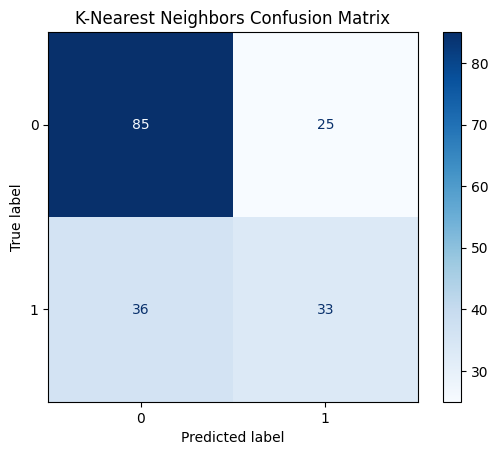

Precision: 0.57
Recall: 0.48


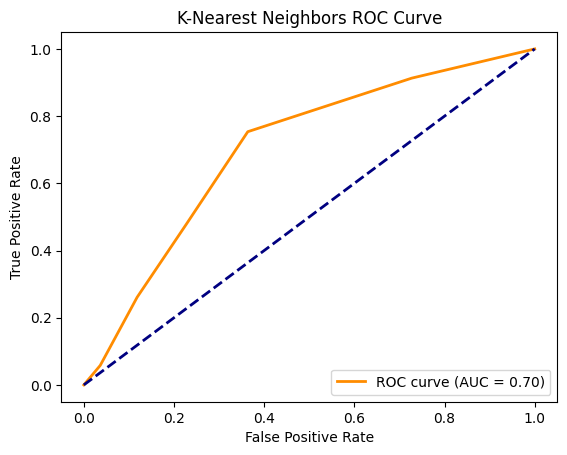

In [40]:
# Evaluate KNN
evaluate_model(y_test, y_pred_knn, y_prob_knn, "K-Nearest Neighbors")

=== Logistic Regression Evaluation ===
Accuracy: 0.79


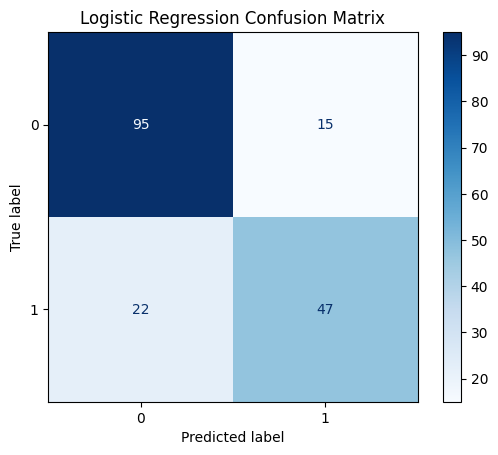

Precision: 0.76
Recall: 0.68


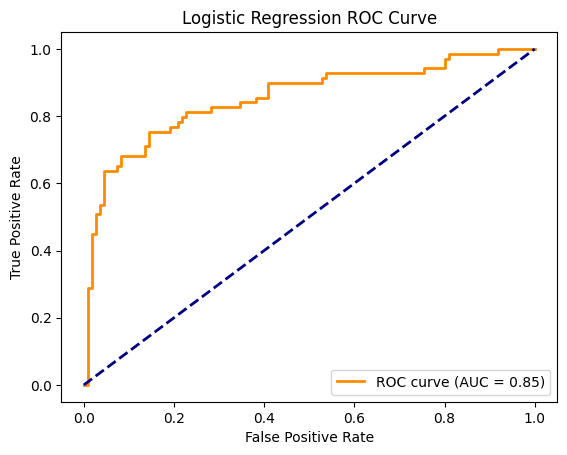

In [38]:
# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_log, y_prob_log, "Logistic Regression")